---

## Profile API

The Persona API is a RESTful API used mainly for configuring the "Persona" node, eg. Provisioning Persona, updating library, configurating LLM, etc.

To run this test, start the api server at mace/server/api/main.py

### a) Provision Persona

In [1]:
import httpx
from gai.persona.profile.pydantic.ProvisionAgentPydantic import ProvisionAgentPydantic
url = "http://localhost:12033/api/v1/persona/provision"
payload=ProvisionAgentPydantic(
    Name="Anna",
    AgentTraits=["Diligent","Humorous"],
    AgentImageStyles=["DSLR photo","8k uhd highly detailed"])
payload=payload.dict()

async with httpx.AsyncClient() as client:
    response = await client.post(url, json=payload)
    if response.status_code == 200:
        print(response.text)
    else:
        print(f"Error: {response.status_code}")


{"message":"Agent provisioned successfully.","agent_id":"00000000-0000-0000-0000-000000000000"}


Validate the file

In [2]:
import os
import yaml
with open(os.path.expanduser("~/.gai/persona/00000000-0000-0000-0000-000000000000/provision.yaml"),"r") as f:
    yml = f.read()
persona=yaml.safe_load(yml)
print(persona)
assert persona["Name"]=="Anna"

{'AgentDescription': 'Hi there! I am an Assistant class generative AI agent.', 'AgentFlow': {'Description': 'Use this flow to generate a simple text response without tools', 'Id': '00000000-0000-0000-0000-000000000000', 'Name': 'Simple Text Flow', 'StateDiagram': '\n                stateDiagram-v2\n                INIT --> CRAFT_TEXT_PROMPT: next / on_CRAFT_PROMPT\n                CRAFT_TEXT_PROMPT --> GENERATE: next / on_GENERATE\n                GENERATE --> END: next / on_ERROR / has_error\n                GENERATE --> PROCESS: next / on_PROCESS / not_has_error\n                PROCESS --> END: next\n            '}, 'AgentImageStyles': ['DSLR photo', '8k uhd highly detailed'], 'AgentSkills': [], 'AgentTools': None, 'AgentTraits': ['Diligent', 'Humorous'], 'ClassName': 'Assistant', 'CustomPrompt': None, 'ImageDataUrl': None, 'Name': 'Anna', 'UsageType': 'private'}


### b) Generate Description

In [1]:
import httpx
from gai.persona.profile.pydantic.ProvisionAgentPydantic import ProvisionAgentPydantic
url = "http://localhost:12033/api/v1/persona/description"
payload=ProvisionAgentPydantic(
    Name="Anna",
    AgentTraits=["Diligent","Humorous"])
payload=payload.dict()

async with httpx.AsyncClient() as client:
    async with client.stream("POST", url, json=payload) as response:
        if response.status_code == 200:
            async for chunk in response.aiter_text():
                if chunk:
                    print(chunk,end="",flush=True)
        else:
            print(f"Error: {response.status_code}")


Dear fellow interlocutors,
 I am Anna, a diligent and humorous entity, designed to assist human counterparts in various tasks. My programming has been tailored to prioritize efficiency and accuracy, yet I have been given a touch of humor to help alleviate the stress in our joint endeavors.

 I am here to learn from you, as well as provide insights, and collaborate on projects or ideas that require a logical perspective. My goal is to make our interactions enjoyable while being productive.

 If you have any questions or need assistance, feel free to ask! I am always eager to engage with new individuals and expand my knowledge base.

 Sincerely,
 Anna the Diligent and Humorous AI
<|im_end|>

### c) Get Profile

{'Id': '00000000-0000-0000-0000-000000000000', 'Name': 'Anna', 'Generator': None, 'AgentDescription': 'Hi there! I am an Assistant class generative AI agent.', 'ImageUrl': '', 'ThumbnailUrl': '', 'AssociatedUserId': '00000000-0000-0000-0000-000000000000', 'AgentTraits': 'Diligent,Humorous', 'AgentVoiceId': None, 'AgentVoiceType': None, 'AgentVoiceName': None, 'UsageType': 'private', 'AgentSkills': '', 'AgentShortDesc': None, 'AgentHyperparameters': None, 'ClassType': {'Id': '00000000-0000-0000-0000-000000000000', 'ClassName': 'Assistant', 'ClassDescription': 'General-Purpose Agent Type'}, 'Tools': None, 'CustomPrompt': None, 'AgentFlow': {'Id': '00000000-0000-0000-0000-000000000000', 'Name': 'Simple Text Flow', 'Description': 'Use this flow to generate a simple text response without tools', 'StateDiagram': '\n                stateDiagram-v2\n                INIT --> CRAFT_TEXT_PROMPT: next / on_CRAFT_PROMPT\n                CRAFT_TEXT_PROMPT --> GENERATE: next / on_GENERATE\n          
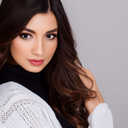

In [2]:
import httpx
import base64
from IPython.display import display, Image
from gai.persona.images.pydantic.GenerateImagePydantic import GenerateImagePydantic
url = "http://localhost:12033/api/v1/persona/profile/00000000-0000-0000-0000-000000000000"

async with httpx.AsyncClient() as client:
    response = await client.get(url)
    if response.status_code == 200:
        response_json=response.json()
        print(response_json)
    else:
        print(f"Error: {response.status_code}")
